In [71]:
import numpy as np
import pandas as pd
df = pd.read_csv("D:\Abhinesh\spamClassifier\spam.csv",encoding="ISO-8859-1")

In [72]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
217,ham,Easy ah?sen got selected means its good..,NaN,NaN,NaN
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN
4938,ham,Tomarrow i want to got to court. At &lt;DECIM...,NaN,NaN,NaN
1011,ham,"I just got home babe, are you still awake ?",NaN,NaN,NaN
830,spam,U have a secret admirer. REVEAL who thinks U R...,NaN,NaN,NaN


In [73]:
df.shape

(5572, 5)

In [74]:
#1.Data cleaning
#2.EDA
#3.Text preprocessing
#4.Model building
#5.Evaluation

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
# droping unneccessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [77]:
df.sample(5)

,v1,v2
3760,ham,Was just about to ask. Will keep this one. May...
1673,spam,Monthly password for wap. mobsi.com is 391784....
2052,spam,Call 09094100151 to use ur mins! Calls cast 10...
1406,spam,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD..."
2395,ham,"Babe, I'm back ... Come back to me ..."


In [78]:
#rename the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5475,ham,Dhoni have luck to win some big title.so we wi...
4086,spam,PRIVATE! Your 2003 Account Statement for 07973...
567,ham,"So anyways, you can just go to your gym or wha..."
4820,ham,Im good! I have been thinking about you...
2871,ham,See you there!


In [79]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [80]:
df['target']=encode.fit_transform(df['target'])

In [81]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
# remove missing value but  i checked my dataset their no missing value which is good for dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [83]:
# check of duplicates
df.duplicated().sum()

np.int64(403)

In [84]:
df = df.drop_duplicates(keep='first')

In [85]:
df.shape

(5169, 2)

# Exploratory Data Analysis

In [86]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

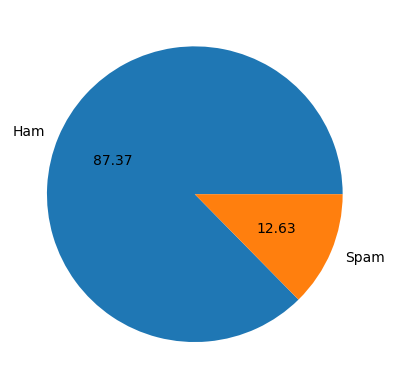

In [87]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [88]:
# nltk stand - natural Language toolkit

In [89]:
import nltk

In [90]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Abhinesh
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [91]:
# punkt_tab is basically a tokenizer which is basic does divide a text into sentence by using unsupervised leaning to build a model for abbreviation words,
# collection , and words that  start sentences.

In [92]:
df.columns

Index(['target', 'text'], dtype='object')

In [93]:
df['num_characters'] =df['text'].apply(len)

In [94]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [95]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [96]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [97]:
#now >> count the number of sentence
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [99]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [100]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.200426,18.456761,1.966531
std,58.387001,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# the ham messages only , target = 0 = ham >> insights
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.123782,1.820195
std,56.405390,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

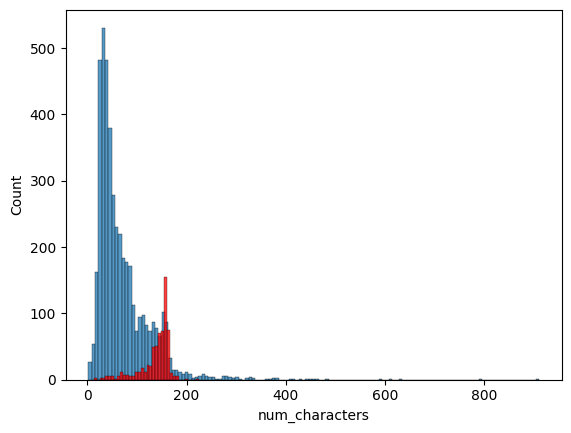

In [102]:
# Data visualization module
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')



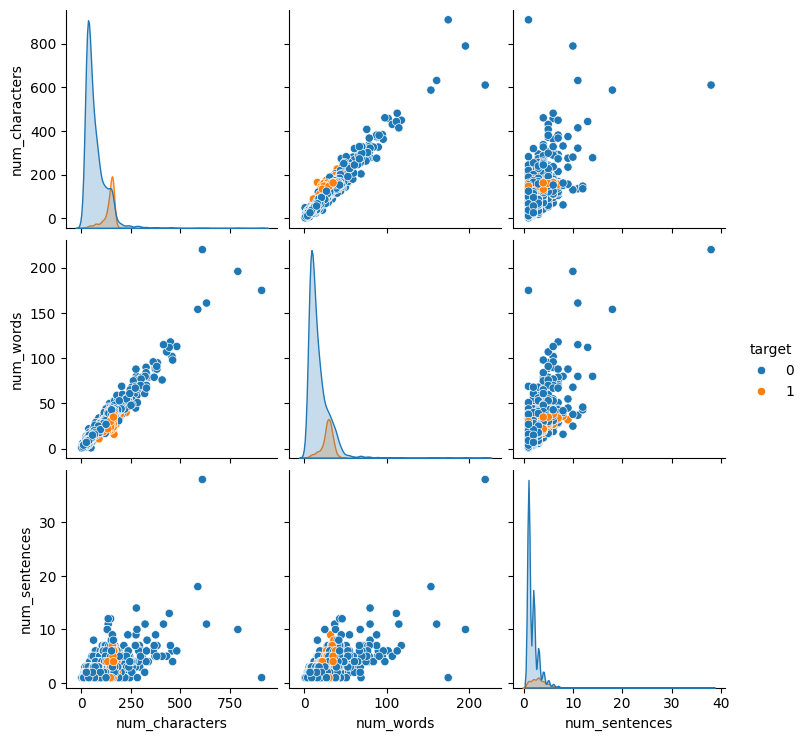

In [103]:
sns.pairplot(df,hue='target')

<Axes: >

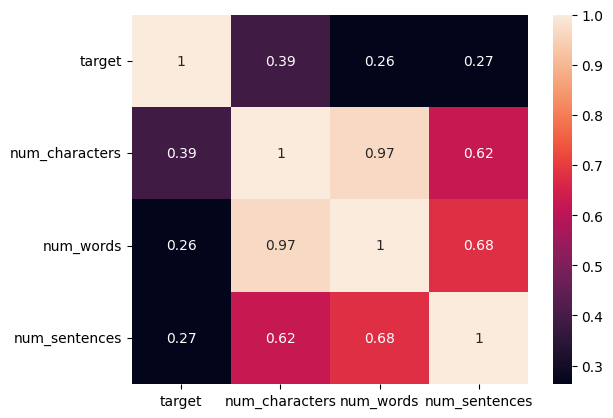

In [104]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

# Data Preprocessing

In [105]:
# lowercase
# tokenize
# remove special characeters like , . ! $
# stopword removal
# stemming

In [106]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Abhinesh
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [108]:
import string

Transform(text) ----------> apply above methon like 

 lowercase

 tokenize

 remove special characeters like , . ! $

 stopword removal
 
 stemming

it will return clean data

In [109]:
def transform_text(text):
    text = text.lower()  # Lowercasing
    text = nltk.word_tokenize(text)  # Tokenizing
    y = []

    # Remove non-alphanumeric characters
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()  # Corrected: Ensure the list is cleared properly

    # Stopword and punctuation removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()  # Corrected: Ensure the list is cleared properly

    # Stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [110]:
transform_text("I 'm gonna be home soon and i don't want to talk to anyone about it.")

'gon na home soon want talk anyon'

In [111]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [112]:
df['transform_text'] = df['text'].apply(transform_text)

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [114]:
import wordcloud

In [115]:
from wordcloud import WordCloud

In [116]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [117]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

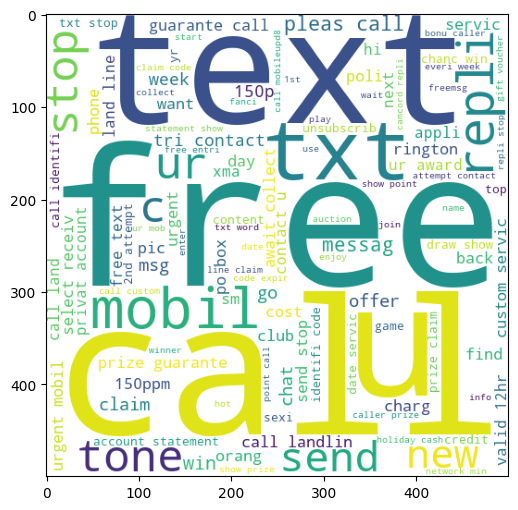

In [118]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [119]:
ham_wc= wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

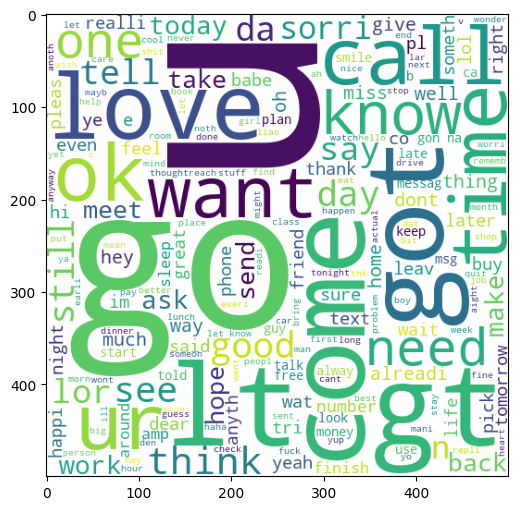

In [120]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [121]:
spam_corpus = []

for msg in df[df['target']==1] ['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [122]:
len(spam_corpus)

9936

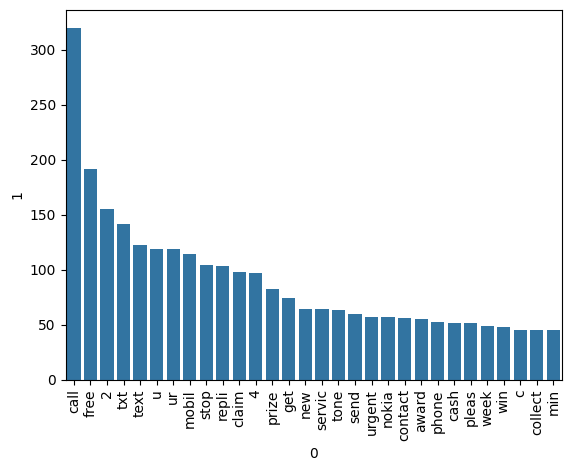

In [123]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [124]:
ham_corpus = []

for msg in df[df['target']==0] ['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [125]:
len(ham_corpus)

35305

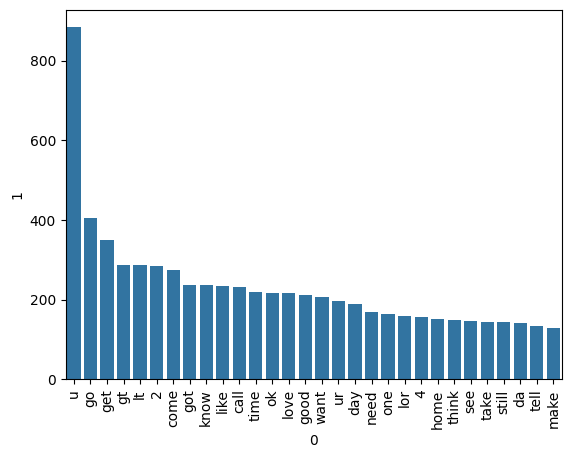

In [126]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [127]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [128]:
x = tfidf.fit_transform(df['transform_text']).toarray()

In [129]:
x.shape

(5169, 3000)

In [130]:
y = df['target'].values

In [131]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [133]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [134]:
gnb = GaussianNB()
mng = MultinomialNB()
bnb = BernoulliNB()

In [135]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [136]:
mng.fit(X_train,y_train)
y_pred1 = mng.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [137]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


# download model using pickel

In [138]:
import pickle

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mng,open('model.pkl','wb'))

In [139]:
import pickle

# Load vectorizer and model
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
model = pickle.load(open("model.pkl", "rb"))

# Test input
test_message = "Congratulations! You've won a free lottery ticket. Claim now!"
transformed_message = vectorizer.transform([test_message])
prediction = model.predict(transformed_message)[0]

print("Prediction:", "Spam" if prediction == 1 else "Not Spam")


Prediction: Spam
